In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, lil_matrix, identity

def edge_check(x,y):
    houses_b = [(69,111),(69,264),
           (138,12),(138,165),
           (192,111),(192,264),
           (261,12),(261,165)]
    houses_lc = [(69,12),(69,165),
              (192,12),(192,165)]
  
    houses_uc = [(138,51),(138,204),
              (261,51),(261,204)]
    for house in houses_b:
        if house[0] < x and x < house[0] + 18 and house[1] < y and y < house[1] + 18:
            return True
    for house in houses_lc:
        if (house[0] < x and x < house[0] + 18 and house[1] < y and y < house[1] + 78) \
        or (house[0] + 12 < x and x < house[0] + 24 and house[1] < y and y < house[1]+18):
            return True
    for house in houses_uc:
        if (house[0] < x and x < house[0] + 18 and house[1] < y and y < house[1] + 78) \
        or (house[0] - 12 < x and x < house[0] - 12 + 13 and house[1] + 60 < y and y < house[1] + 60 + 18):
            return True 
    if x>299 or y>299 or y == 0:
        return True

    return False

def solve(a1, a2, k, h, m, checker):

    M = m * m

    x = np.zeros((M, 1))
    for i in range(300):
        x[300 * i, 0]=1

    A = lil_matrix((M, M))

    b = np.zeros(M)

    dx = [1, -1, 0, 0]
    dy = [0, 0, 1, -1]
    
    u0 = 1-4*(k) / (4 * h**2)
    ps = [
        k / (4 * h**2) - a1 / (8 * h),
        k / (4 * h**2) + a1 / (8 * h),
        k/(4 * h**2) - a2 / (8 * h),
        k/(4 * h**2) + a2 / (8 * h)
    ]

    for i in range(0, m): 
        for e in range(0, m):
            ind = i*m+e
            A[ind,ind] = u0
            for j in range(0, 4):
                x1 = i + dx[j]
                y1 = e + dy[j]
                p = ps[j]

                if x1==0:
                    b[ind] -= p
                elif checker(x1,y1):
                    A[ind,ind] += p
                else:
                    A[ind,x1*300+y1] = p

    A = csr_matrix(A)

    b = b.reshape(M, -1)
    eps = 1e-4
    while True:
        x_new = (A * x + b)
        error = np.max(np.abs(x_new - x))
        if error < eps:
            break
        x = x_new
    return x.reshape((300,300))


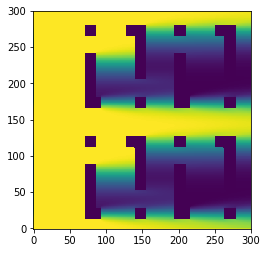

In [52]:
a1 = 1.0
a2 = 0
k = 0.5
h = 1
m = 300
x_res = solve(a1, a2, k, h, m, edge_check)
plt.imshow(1-x_res.T)
plt.gca().invert_yaxis()
plt.show()